In [54]:
import os
import numpy as np
import pickle
from loren_frank_data_processing import (make_epochs_dataframe,
                                         make_neuron_dataframe)
from src.parameters import (ANIMALS, MAX_N_EXPOSURES, MIN_N_NEURONS)

from tqdm.auto import tqdm

import levy
from scipy import stats

import matplotlib.pyplot as plt

In [127]:
def get_levy_exponent(Replay_traj):
    '''
    Get the levy exponent for replay trajectory
    Input (dictionary): Replay_traj
    '''
    #initialze an empty numpy array
    all_steps = []

    keys = Replay_traj.keys()
    for key in keys:
        #get the replay trajectory for each ripple events
        ripple_traj = Replay_traj[key]
        traj_step = np.abs(np.diff(ripple_traj[::1]))
        #concatenate the steps for all ripple events
        all_steps = np.concatenate((all_steps, traj_step))
    
    return all_steps
        
        
    

In [133]:

epoch_info = make_epochs_dataframe(ANIMALS)
neuron_info = make_neuron_dataframe(ANIMALS)
n_neurons = (neuron_info
                .groupby(['animal', 'day', 'epoch'])
                .neuron_id
                .agg(len)
                .rename('n_neurons')
                .to_frame())

epoch_info = epoch_info.join(n_neurons)
is_w_track = (epoch_info.environment
                .isin(['TrackA', 'TrackB', 'WTrackA', 'WTrackB']))
#is_animal = epoch_info.index.isin(['bon', 'fra', 'gov', 'dud', 'con'], level='animal')
is_animal = epoch_info.index.isin(['bon'], level='animal')
valid_epochs = (is_w_track &
                (epoch_info.n_neurons > MIN_N_NEURONS) &
                (epoch_info.exposure <= MAX_N_EXPOSURES) &
                is_animal
                )

PROCESSED_DATA_DIR = '/home/zilong/Desktop/replay_trajectory_paper/Processed-Data'

for epoch_key in tqdm(epoch_info[valid_epochs].index, desc='epochs'):
    animal, day, epoch = epoch_key

    print(f'Animal: {animal}, Day: {day}, Epoch: {epoch}')
        
    print('Load replay trajectories for the current epoch...')
    #load the dictionary from the 'ReplayTrajectories' folder under PROCESSED_DATA_DIR using pickle
    with open(os.path.join(PROCESSED_DATA_DIR, 'ReplayTrajectories', f'{animal}_{day:02d}_{epoch:02d}_traj.pkl'), 'rb') as f:
        Replay_traj = pickle.load(f)
        
    #figure
    plt.figure()
    steps = get_levy_exponent(Replay_traj)
    #performa a histogram of the steps
    plt.hist(steps, bins=100, density=True)
    
    #perform the fit and add the fitted curve to the histogram
    params = levy.fit_levy(steps, sigma=1.0)
    print(params)
    params = params[0].get()
    dist = stats.levy_stable
    x = np.linspace(np.min(steps), np.max(steps), 100)
    
    plt.plot(x, dist.pdf(x, params[0], params[1], params[2], params[3]),lw=1, alpha=1)
        
    plt.xlabel('Step size')
    plt.ylabel('Count')
    #save the figure
    folder = '/home/zilong/Desktop/replay_trajectory_paper/figures/Zilong/ReplayHistgram'
    plt.savefig(os.path.join(folder, f'{animal}_{day:02d}_{epoch:02d}_hist.png'))
    #close
    plt.close()
    
    #Count the ratio of steps that are out of three standard deviations
    #get the mean and standard deviation of the steps
    mean = np.mean(steps)
    std = np.std(steps)
    #get the number of steps that are out of three standard deviations
    n_outlier = np.sum(np.abs(steps-mean)>2*std)
    #get the ratio and print mean and standard deviation as well
    ratio = n_outlier/len(steps)
    print(f'Ratio of steps that are out of three standard deviations: {ratio}')
    print(f'Mean: {mean}, Standard deviation: {std}')

         

epochs:   0%|          | 0/24 [00:00<?, ?it/s]

Animal: bon, Day: 3, Epoch: 2
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.27, mu=0.21, sigma=1.00, 12773.145627096159)


epochs:   4%|▍         | 1/24 [00:01<00:40,  1.75s/it]

Ratio of steps that are out of three standard deviations: 0.014697876973326075
Mean: 1.9147928051431387, Standard deviation: 11.717982082754032
Animal: bon, Day: 3, Epoch: 4
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.29, mu=0.22, sigma=1.00, 17864.96027341889)


epochs:   8%|▊         | 2/24 [00:03<00:38,  1.75s/it]

Ratio of steps that are out of three standard deviations: 0.016070222822417286
Mean: 1.8415822487826117, Standard deviation: 10.401527061024284
Animal: bon, Day: 3, Epoch: 6
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.17, mu=0.13, sigma=1.00, 16886.679499964728)


epochs:  12%|█▎        | 3/24 [00:04<00:32,  1.55s/it]

Ratio of steps that are out of three standard deviations: 0.05273933338792892
Mean: 7.214756604677854, Standard deviation: 25.79188612032796
Animal: bon, Day: 4, Epoch: 2
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.22, mu=0.18, sigma=1.00, 12569.006452777574)


epochs:  17%|█▋        | 4/24 [00:06<00:32,  1.62s/it]

Ratio of steps that are out of three standard deviations: 0.01463860933211345
Mean: 1.796670956596825, Standard deviation: 11.77940724989509
Animal: bon, Day: 4, Epoch: 4
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.17, mu=0.13, sigma=1.00, 13549.14352543644)


epochs:  21%|██        | 5/24 [00:08<00:30,  1.62s/it]

Ratio of steps that are out of three standard deviations: 0.01867881548974943
Mean: 1.9342113556200093, Standard deviation: 11.7459189044401
Animal: bon, Day: 4, Epoch: 6
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.21, mu=0.16, sigma=1.00, 15898.564473327484)


epochs:  25%|██▌       | 6/24 [00:09<00:28,  1.58s/it]

Ratio of steps that are out of three standard deviations: 0.03918507532589181
Mean: 5.037493271781955, Standard deviation: 21.24049001555414
Animal: bon, Day: 5, Epoch: 2
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.21, mu=0.16, sigma=1.00, 9769.962994967742)


epochs:  29%|██▉       | 7/24 [00:11<00:26,  1.58s/it]

Ratio of steps that are out of three standard deviations: 0.01313522825150732
Mean: 1.617350301088511, Standard deviation: 10.830069955285369
Animal: bon, Day: 5, Epoch: 4
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.20, mu=0.16, sigma=1.00, 11525.1799068916)


epochs:  33%|███▎      | 8/24 [00:12<00:25,  1.57s/it]

Ratio of steps that are out of three standard deviations: 0.010664123461071614
Mean: 1.223012005424091, Standard deviation: 8.22230484539946
Animal: bon, Day: 5, Epoch: 6
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.17, mu=0.13, sigma=1.00, 13432.667778906532)


epochs:  38%|███▊      | 9/24 [00:13<00:21,  1.41s/it]

Ratio of steps that are out of three standard deviations: 0.051671087533156496
Mean: 6.496503132265119, Standard deviation: 22.50726839354846
Animal: bon, Day: 6, Epoch: 2
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.18, mu=0.14, sigma=1.00, 8817.41088655436)


epochs:  42%|████▏     | 10/24 [00:15<00:19,  1.41s/it]

Ratio of steps that are out of three standard deviations: 0.013596059113300493
Mean: 1.3951121183743211, Standard deviation: 10.2657812055464
Animal: bon, Day: 6, Epoch: 4
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.14, mu=0.11, sigma=1.00, 12373.276106920555)


epochs:  46%|████▌     | 11/24 [00:16<00:18,  1.40s/it]

Ratio of steps that are out of three standard deviations: 0.022052990639378073
Mean: 2.3351695855789916, Standard deviation: 13.811652971132158
Animal: bon, Day: 6, Epoch: 6
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.17, mu=0.13, sigma=1.00, 14885.080229592806)


epochs:  50%|█████     | 12/24 [00:18<00:17,  1.43s/it]

Ratio of steps that are out of three standard deviations: 0.04670398529534631
Mean: 5.26615212011426, Standard deviation: 20.901501198238478
Animal: bon, Day: 7, Epoch: 2
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.10, mu=0.08, sigma=1.00, 8887.933181112247)


epochs:  54%|█████▍    | 13/24 [00:19<00:16,  1.46s/it]

Ratio of steps that are out of three standard deviations: 0.014003071641521366
Mean: 1.194791850363735, Standard deviation: 9.034022755217041
Animal: bon, Day: 7, Epoch: 4
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.12, mu=0.10, sigma=1.00, 10450.204190550887)


epochs:  58%|█████▊    | 14/24 [00:20<00:14,  1.41s/it]

Ratio of steps that are out of three standard deviations: 0.017733990147783252
Mean: 1.8041952990321481, Standard deviation: 12.479588901768398
Animal: bon, Day: 7, Epoch: 6
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.23, mu=0.18, sigma=1.00, 15544.693896192319)


epochs:  62%|██████▎   | 15/24 [00:22<00:11,  1.33s/it]

Ratio of steps that are out of three standard deviations: 0.05108885417623817
Mean: 6.333680110025222, Standard deviation: 22.361936467287933
Animal: bon, Day: 8, Epoch: 2
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.14, mu=0.11, sigma=1.00, 10039.957446683831)


epochs:  67%|██████▋   | 16/24 [00:23<00:10,  1.32s/it]

Ratio of steps that are out of three standard deviations: 0.018502704241389126
Mean: 1.960321225148169, Standard deviation: 12.555257607507919
Animal: bon, Day: 8, Epoch: 4
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.14, mu=0.11, sigma=1.00, 11921.1694683429)


epochs:  71%|███████   | 17/24 [00:25<00:09,  1.42s/it]

Ratio of steps that are out of three standard deviations: 0.017462881760135395
Mean: 1.7794860847056833, Standard deviation: 11.667917296745163
Animal: bon, Day: 8, Epoch: 6
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.22, mu=0.17, sigma=1.00, 10358.426406569528)


epochs:  75%|███████▌  | 18/24 [00:26<00:07,  1.31s/it]

Ratio of steps that are out of three standard deviations: 0.030244468064547298
Mean: 3.246549616043853, Standard deviation: 16.764287648543757
Animal: bon, Day: 9, Epoch: 2
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.10, mu=0.08, sigma=1.00, 10264.664760918175)


epochs:  79%|███████▉  | 19/24 [00:27<00:06,  1.31s/it]

Ratio of steps that are out of three standard deviations: 0.022006311243979407
Mean: 2.120098041534916, Standard deviation: 13.332639077731306
Animal: bon, Day: 9, Epoch: 4
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.16, mu=0.13, sigma=1.00, 13381.251975967303)


epochs:  83%|████████▎ | 20/24 [00:29<00:06,  1.53s/it]

Ratio of steps that are out of three standard deviations: 0.01785200115174201
Mean: 1.6709278764890045, Standard deviation: 10.496495844983887
Animal: bon, Day: 9, Epoch: 6
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.13, mu=0.10, sigma=1.00, 12712.506094077926)


epochs:  88%|████████▊ | 21/24 [00:30<00:04,  1.48s/it]

Ratio of steps that are out of three standard deviations: 0.03491046492525053
Mean: 3.1449884818829936, Standard deviation: 15.15520176462068
Animal: bon, Day: 10, Epoch: 2
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.22, mu=0.17, sigma=1.00, 11684.054991710827)


epochs:  92%|█████████▏| 22/24 [00:32<00:02,  1.48s/it]

Ratio of steps that are out of three standard deviations: 0.01823065028078457
Mean: 1.9553780867686565, Standard deviation: 12.391165598589561
Animal: bon, Day: 10, Epoch: 4
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.13, mu=0.10, sigma=1.00, 14835.898539328076)


epochs:  96%|█████████▌| 23/24 [00:34<00:01,  1.56s/it]

Ratio of steps that are out of three standard deviations: 0.018861523848293642
Mean: 1.7647332004930016, Standard deviation: 10.823217544380613
Animal: bon, Day: 10, Epoch: 6
Load replay trajectories for the current epoch...
(par=0, alpha=0.50, beta=0.20, mu=0.16, sigma=1.00, 12680.041811684072)


epochs: 100%|██████████| 24/24 [00:35<00:00,  1.46s/it]

Ratio of steps that are out of three standard deviations: 0.0341726618705036
Mean: 3.3242553944716615, Standard deviation: 16.10033644561529


(par=0, alpha=0.50, beta=1.00, mu=0.00, sigma=1.00, 772.8341911571338)


Text(0, 0.5, 'probability density')

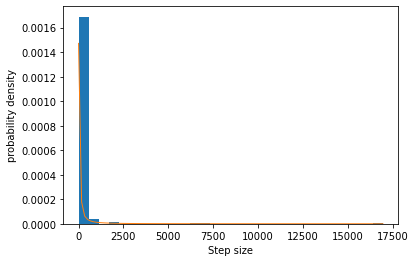

In [125]:

import scipy.stats as st
import levy

points = 200
jennys_constant = 8675309
alpha, beta = 0.5, 1.0

draw = st.levy_stable.rvs(alpha, beta, size=points, random_state=jennys_constant)

#histogram on draw
plt.figure()
plt.hist(draw, bins=30, density=True)


params = levy.fit_levy(draw, mu=0, sigma=1)
print(params)

params = params[0].get()
dist = stats.levy_stable
x = np.linspace(np.min(draw), np.max(draw), 100)

plt.plot(x, dist.pdf(x, params[0], params[1]),lw=1, alpha=1)

plt.xlabel('Step size')
plt.ylabel('probability density')

In [101]:
sum(draw>10)

748

(par=0, alpha=0.50, beta=0.05, mu=0.00, sigma=0.00, -125610.91032786045)

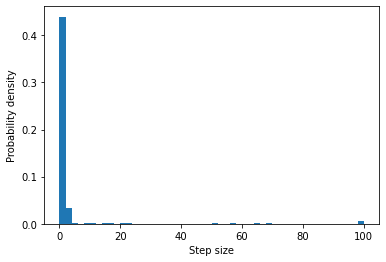

In [68]:

plt.figure()
steps = get_levy_exponent(Replay_traj)

steps[steps>100]=100
#performa a histogram of the steps
plt.hist(steps, bins=50, density=True)
plt.xlabel('Step size')
plt.ylabel('Probability density')

params = levy.fit_levy(steps)
params

In [52]:
levy.random(0.5, 0.905, 0.707, 1.414, shape = )

par=0, alpha=0.50, beta=0.12, mu=0.00, sigma=0.00

In [56]:
help(levy.fit_levy)

Help on function fit_levy in module levy:

fit_levy(x, par='0', **kwargs)
    Estimate parameters of Levy stable distribution given data x, using
    Maximum Likelihood estimation.
    
    By default, searches all possible Levy stable distributions. However
    you may restrict the search by specifying the values of one or more
    parameters. Notice that the parameters to be fixed can be chosen in
    all the available parametrizations {0, 1, A, B, M}.
    
    Examples:
        >>> np.random.seed(0)
        >>> x = random(1.5, 0, 0, 1, shape=(200,))
        >>> fit_levy(x) # -- Fit a stable distribution to x
        (par=0, alpha=1.52, beta=-0.08, mu=0.05, sigma=0.99, 402.37150603509247)
    
        >>> fit_levy(x, beta=0.0) # -- Fit a symmetric stable distribution to x
        (par=0, alpha=1.53, beta=0.00, mu=0.03, sigma=0.99, 402.43833088693725)
    
        >>> fit_levy(x, beta=0.0, mu=0.0) # -- Fit a symmetric distribution centered on zero to x
        (par=0, alpha=1.53, beta

In [58]:
help(stats.levy_stable)

Help on levy_stable_gen in module scipy.stats._continuous_distns object:

class levy_stable_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A Levy-stable continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  See Also
 |  --------
 |  levy, levy_l
 |  
 |  Notes
 |  -----
 |  The distribution for `levy_stable` has characteristic function:
 |  
 |  .. math::
 |  
 |      \varphi(t, \alpha, \beta, c, \mu) =
 |      e^{it\mu -|ct|^{\alpha}(1-i\beta \operatorname{sign}(t)\Phi(\alpha, t))}
 |  
 |  where:
 |  
 |  .. math::
 |  
 |      \Phi = \begin{cases}
 |              \tan \left({\frac {\pi \alpha }{2}}\right)&\alpha \neq 1\\
 |              -{\frac {2}{\pi }}\log |t|&\alpha =1
 |              \end{cases}
 |  
 |  The probability density function for `levy_stable` is:
 |  
 |  .. math::
 |  
 |      f(x) = \frac{1}{2\pi}\int_{-\infty}^\infty \varphi(t)e^{-ixt}\,dt
 |  
 |  where :math:`-\infty < t < \infty`. This integral does not have a known closed form.
 |  
 |  For